In [1]:
import os, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision

#### Пример использования __```dataset_paths_create```__ и __```MyLoader```__ 

In [2]:
from torch.utils.data import DataLoader

from assets.dataset.utils import dataset_paths_create
from assets.dataset.dataloader import MyLoader


dataset_directory = os.path.join('..', '..', 'FMCW_Data', 'adcdata');
train_data_path = os.path.join(dataset_directory, 'train');
# test_data_path = os.path.join(dataset_directory, 'test');

# train_data_paths, valid_data_paths, test_data_paths, class_to_idx, idx_to_class = dataset_paths_create(train_data_path, test_data_path);
train_data_paths, valid_data_paths, class_to_idx, idx_to_class = dataset_paths_create(train_data_path);

train_dataset = MyLoader(train_data_paths, class_to_idx);
valid_dataset = MyLoader(valid_data_paths, class_to_idx);


BATCH_SIZE = 5;

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True);
valid_loader = DataLoader(valid_dataset, batch_size = BATCH_SIZE, shuffle = True);
# test_loader = DataLoader(test_data_paths, batch_size = BATCH_SIZE, shuffle = True);


print(f'Number of training examples: {len(train_dataset)}');
print(f'Number of validation examples: {len(valid_dataset)}');
# print(f'Number of test examples: {len(test_data_paths)}');

Number of training examples: 4444
Number of validation examples: 889


#### Просмотр директории датасета

In [3]:
content = os.listdir(dataset_directory);
print(content);
for dir_ in content:
    path_ = os.path.join(dataset_directory, dir_);
    if os.path.isdir(path_):
        print(dir_, ':\t', os.listdir(path_ ));

['train']
train :	 ['circle', 'door_1', 'none_target', 'people']


#### Функция отображения батчей

In [14]:
def imshow(inp, title = None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0));    
    plt.figure(figsize = (12, 16));
    plt.imshow(inp[:, :, 0], 
               origin = 'lower', interpolation = 'bessel');
    if title is not None:
        plt.title(title);
    plt.axis('off');
    plt.show();

#### Получение списка доступных классов

In [15]:
from assets.dataset.raw_to_npy import get_class_names

names_classes = get_class_names(idx_to_class);
print(names_classes);

['circle', 'door_1', 'none_target', 'people']


#### Изображение батча

classes: tensor([3, 3, 0, 3, 3])
inputs.shape: torch.Size([5, 4, 256, 128])


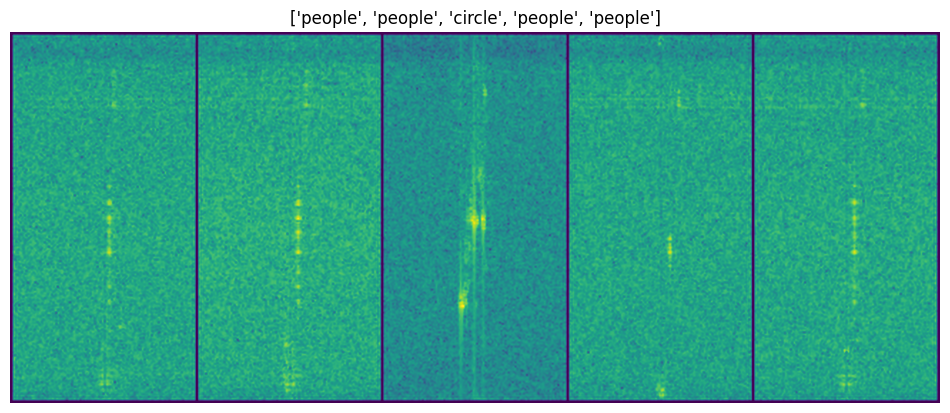

In [17]:
# Get a batch of training data
inputs, classes = next(iter(valid_loader));
print('classes:', classes);
print('inputs.shape:', inputs.shape);
# Make a grid from batch
out = torchvision.utils.make_grid(inputs);
imshow(out, title = [names_classes[x] for x in classes]);